<a href="https://colab.research.google.com/github/kumareshvj/Machine-learing-classification/blob/main/Default_of_credit_card_clients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Classification
##### **Contribution**    - Individual


# **Project Summary -**

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

# **GitHub Link -**

https://github.com/kumareshvj/Machine-learing-classification

# **Problem Statement**


**Write Problem Statement Here.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [411]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import matplotlib
%matplotlib inline

### Dataset Loading

In [412]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')
file_path = '//content/drive/MyDrive/AlmaBetter/capstone project/Machine_learning_classification/Copy of default of credit card clients.xlsx'
df = pd.read_excel(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [413]:
# Dataset First Look
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Dataset Rows & Columns count

In [414]:
# Dataset Rows & Columns count
df.shape

(30000, 25)

### Dataset Information

In [415]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

#### Duplicate Values

In [416]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [417]:
# Missing Values/Null Values Count
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

<Axes: >

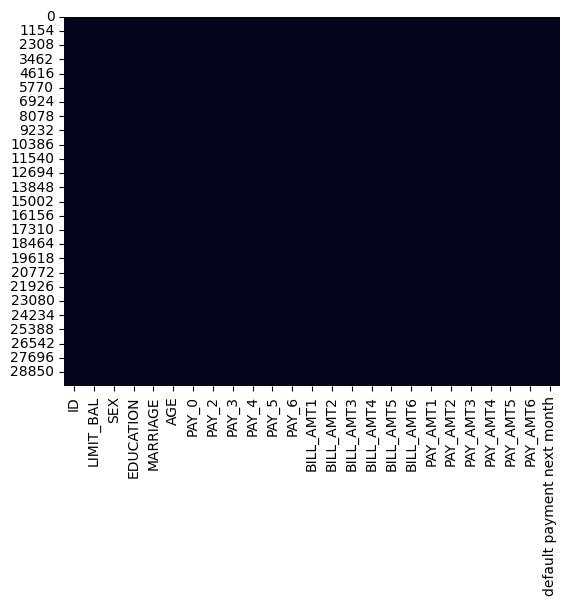

In [418]:
# Visualizing the missing values
sns.heatmap(df.isnull(),cbar = False)

### What did you know about your dataset?

From the above dataset we can conclude:

 There are around 3000 rows and 25 columns.

 No null value present in the dataset.

 all the column in the datasets are numerical variable.

## ***2. Understanding Your Variables***

In [419]:
# Dataset Columns
df.columns.to_list()

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [420]:
# Dataset Describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


### Variables Description 

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

### Check Unique Values for each variable.

In [421]:
# Check Unique Values for each variable.
for x in df.columns.to_list():
  print(f'Number of non unique values in {x.lower()} are {df[x].nunique()}')

Number of non unique values in id are 30000
Number of non unique values in limit_bal are 81
Number of non unique values in sex are 2
Number of non unique values in education are 7
Number of non unique values in marriage are 4
Number of non unique values in age are 56
Number of non unique values in pay_0 are 11
Number of non unique values in pay_2 are 11
Number of non unique values in pay_3 are 11
Number of non unique values in pay_4 are 11
Number of non unique values in pay_5 are 10
Number of non unique values in pay_6 are 10
Number of non unique values in bill_amt1 are 22723
Number of non unique values in bill_amt2 are 22346
Number of non unique values in bill_amt3 are 22026
Number of non unique values in bill_amt4 are 21548
Number of non unique values in bill_amt5 are 21010
Number of non unique values in bill_amt6 are 20604
Number of non unique values in pay_amt1 are 7943
Number of non unique values in pay_amt2 are 7899
Number of non unique values in pay_amt3 are 7518
Number of non u

## 3. ***Data Wrangling***

### Data Wrangling Code

In [422]:
# Write your code to make your dataset analysis ready.

In [423]:
# updating the columns name for Pay_0 to Pay_1
df.rename(columns = {'PAY_0':'PAY_1','default payment next month':'Payment_default'},inplace = True)

In [424]:
df = df.astype('int')

In [425]:
df.drop(columns = 'ID',axis = 1,inplace = True)

In [426]:
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [427]:
df.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [428]:
df.LIMIT_BAL.unique()

array([  20000,  120000,   90000,   50000,  500000,  100000,  140000,
        200000,  260000,  630000,   70000,  250000,  320000,  360000,
        180000,  130000,  450000,   60000,  230000,  160000,  280000,
         10000,   40000,  210000,  150000,  380000,  310000,  400000,
         80000,  290000,  340000,  300000,   30000,  240000,  470000,
        480000,  350000,  330000,  110000,  420000,  170000,  370000,
        270000,  220000,  190000,  510000,  460000,  440000,  410000,
        490000,  390000,  580000,  600000,  620000,  610000,  700000,
        670000,  680000,  430000,  550000,  540000, 1000000,  530000,
        710000,  560000,  520000,  750000,  640000,   16000,  570000,
        590000,  660000,  720000,  327680,  740000,  800000,  760000,
        690000,  650000,  780000,  730000])

In [429]:
df[['PAY_1','BILL_AMT1','PAY_AMT1',
   'PAY_2','BILL_AMT2','PAY_AMT2',
   'PAY_3', 'BILL_AMT3', 'PAY_AMT3','PAY_4','BILL_AMT4','PAY_AMT4','PAY_5','BILL_AMT5','PAY_AMT5','PAY_6','BILL_AMT6','PAY_AMT6','Payment_default']].head()

,PAY_1,BILL_AMT1,PAY_AMT1,PAY_2,BILL_AMT2,PAY_AMT2,PAY_3,BILL_AMT3,PAY_AMT3,PAY_4,BILL_AMT4,PAY_AMT4,PAY_5,BILL_AMT5,PAY_AMT5,PAY_6,BILL_AMT6,PAY_AMT6,Payment_default
0,2,3913,0,2,3102,689,-1,689,0,-1,0,0,-2,0,0,-2,0,0,1
1,-1,2682,0,2,1725,1000,0,2682,1000,0,3272,1000,0,3455,0,2,3261,2000,1
2,0,29239,1518,0,14027,1500,0,13559,1000,0,14331,1000,0,14948,1000,0,15549,5000,0
3,0,46990,2000,0,48233,2019,0,49291,1200,0,28314,1100,0,28959,1069,0,29547,1000,0
4,-1,8617,2000,0,5670,36681,-1,35835,10000,0,20940,9000,0,19146,689,0,19131,679,0


In [430]:
df['Payment_default'].value_counts()[1]/df['Payment_default'].value_counts()

0    0.284027
1    1.000000
Name: Payment_default, dtype: float64

In [431]:
#precentage of payment default
df['Payment_default'].sum()/len(df['Payment_default'])

0.2212

In [432]:
df[df['PAY_1']== 1].head().T

,13,15,18,19,26
LIMIT_BAL,70000,50000,360000,180000,60000
SEX,1,2,2,2,1
EDUCATION,2,3,1,1,1
MARRIAGE,2,3,1,2,2
AGE,30,23,49,29,27
PAY_1,1,1,1,1,1
PAY_2,2,2,-2,-2,-2
PAY_3,2,0,-2,-2,-1
PAY_4,0,0,-2,-2,-1
PAY_5,0,0,-2,-2,-1


In [433]:
df['PAY_1'].unique()

array([ 2, -1,  0, -2,  1,  3,  4,  8,  7,  5,  6])

In [434]:
fil = (df.PAY_1 == -2) | (df.PAY_1 == -1)
df.loc[fil,'PAY_1'] = 0
fil = (df.PAY_2 == -2) | (df.PAY_2 == -1)
df.loc[fil,'PAY_2'] = 0
fil = (df.PAY_3 == -2) | (df.PAY_3 == -1)
df.loc[fil,'PAY_3'] = 0
fil = (df.PAY_4 == -2) | (df.PAY_4 == -1)
df.loc[fil,'PAY_4'] = 0
fil = (df.PAY_5 == -2) | (df.PAY_5 == -1)
df.loc[fil,'PAY_5'] = 0
fil = (df.PAY_6 == -2) | (df.PAY_6 == -1)
df.loc[fil,'PAY_6'] = 0

In [435]:
df['PAY_1'].unique()

array([2, 0, 1, 3, 4, 8, 7, 5, 6])

In [436]:
df['SE_MA'] = 0
df.loc[((df.SEX == 1) & (df.MARRIAGE == 1)), 'SE_MA'] = 1
df.loc[((df.SEX == 1) & (df.MARRIAGE == 2)), 'SE_MA'] = 2
df.loc[((df.SEX == 1) & (df.MARRIAGE == 3)), 'SE_MA'] = 3
df.loc[((df.SEX == 2) & (df.MARRIAGE == 1)), 'SE_MA'] = 4
df.loc[((df.SEX == 2) & (df.MARRIAGE == 2)), 'SE_MA'] = 5
df.loc[((df.SEX == 2) & (df.MARRIAGE == 3)), 'SE_MA'] = 6

<Axes: >

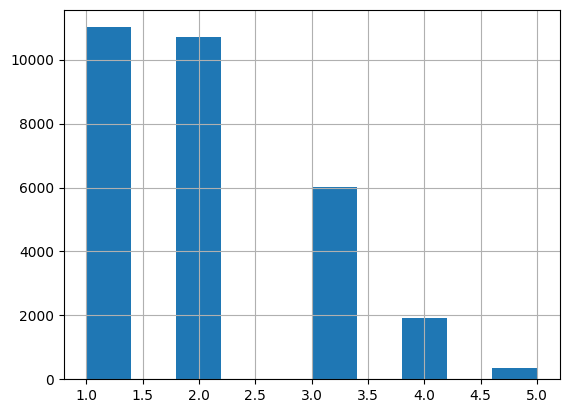

In [437]:
df['Agebin'] = pd.cut(df['AGE'],6,labels = [1,2,3,4,5,6])
df['Agebin'] = pd.to_numeric(df['Agebin'])
df.loc[(df['Agebin'] == 6), 'Agebin'] = 5
df.Agebin.hist()

In [438]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'Payment_default', 'SE_MA', 'Agebin'],
      dtype='object')

### What all manipulations have you done and insights you found?

Answer Here.

In [439]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Payment_default,SE_MA,Agebin
0,20000,2,2,1,24,2,2,0,0,0,...,0,0,689,0,0,0,0,1,4,1
1,120000,2,2,2,26,0,2,0,0,0,...,3261,0,1000,1000,1000,0,2000,1,5,1
2,90000,2,2,2,34,0,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,5,2
3,50000,2,2,1,37,0,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,4,2
4,50000,1,2,1,57,0,0,0,0,0,...,19131,2000,36681,10000,9000,689,679,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,15980,8500,20000,5003,3047,5000,1000,0,1,2
29996,150000,1,3,2,43,0,0,0,0,0,...,0,1837,3526,8998,129,0,0,0,2,3
29997,30000,1,2,2,37,4,3,2,0,0,...,19357,0,0,22000,4200,2000,3100,1,2,2
29998,80000,1,3,1,41,1,0,0,0,0,...,48944,85900,3409,1178,1926,52964,1804,1,1,3


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

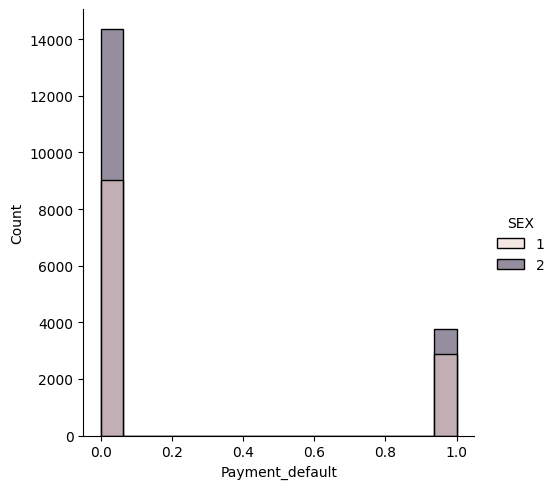

In [440]:
# Chart - 1 visualization code
sns.displot(df,x = 'Payment_default',hue='SEX')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [441]:
# Chart - 2 visualization code
def subplot(a,variable,n_rows,n_col,n_bins):
  fig = plt.figure()
  for i, n in enumerate(variable):
    ax = fig.add_subplot(n_rows,n_col,i+1)
    a[variable].hist(bins = n_bins,ax=ax)
  fig.tight_layout()
  plt.show()


<ipython-input-441-e3e2ee3c0a0c>:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  a[variable].hist(bins = n_bins,ax=ax)


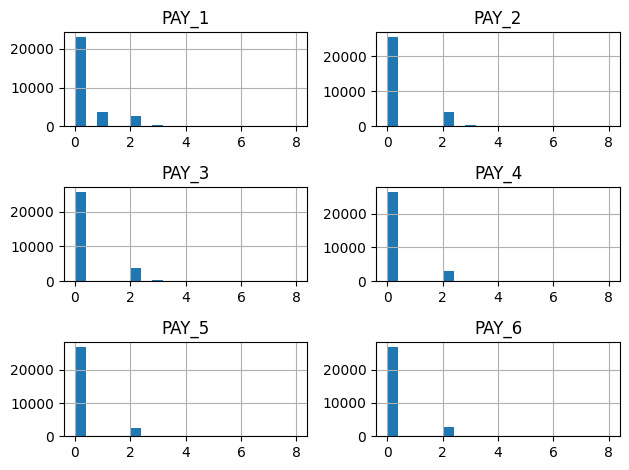

In [442]:
df1 =df[['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']] 
subplot(df1,df1.columns,2,3,20)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

<Axes: >

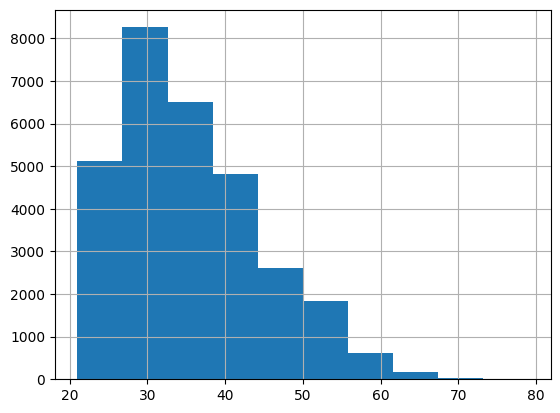

In [443]:
# Chart - 3 visualization code
df.AGE.hist()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

<Axes: >

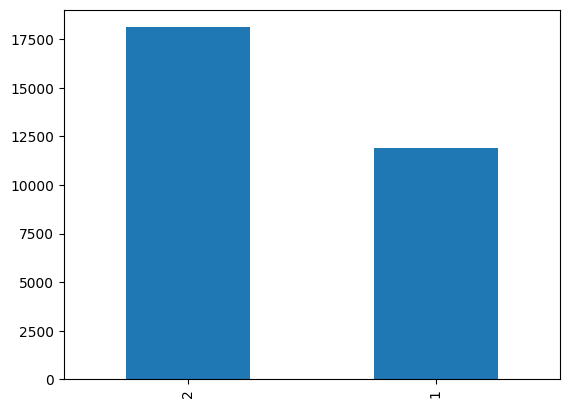

In [444]:
# Chart - 4 visualization code
df['SEX'].value_counts().plot(kind='bar',stacked = True)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [445]:
# Chart - 5 visualization code
df2 = df.groupby(['SEX','EDUCATION']).size().unstack()

<Axes: xlabel='SEX'>

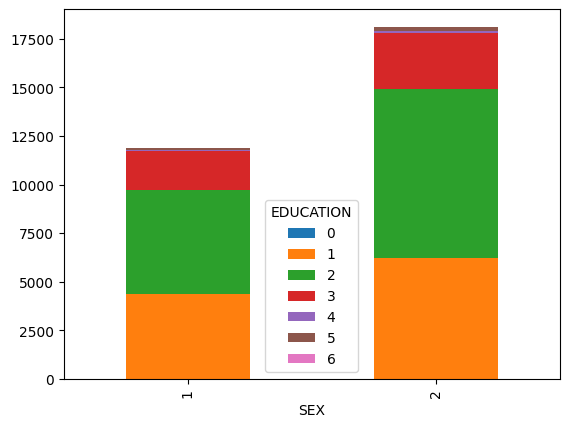

In [446]:
df2.plot(kind='bar',stacked= True)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

<Axes: >

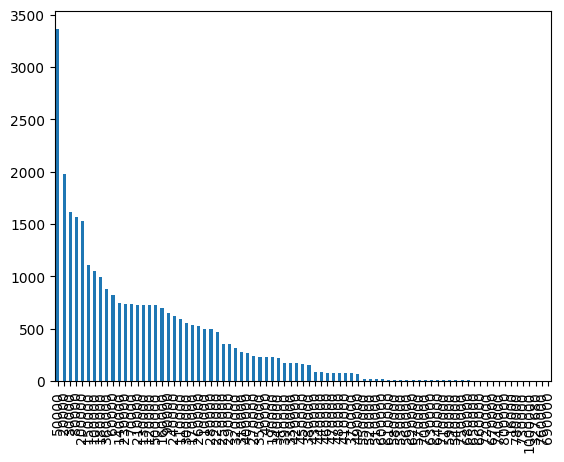

In [447]:
# Chart - 6 visualization code
df['LIMIT_BAL'].value_counts().plot(kind = 'bar')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

<Axes: >

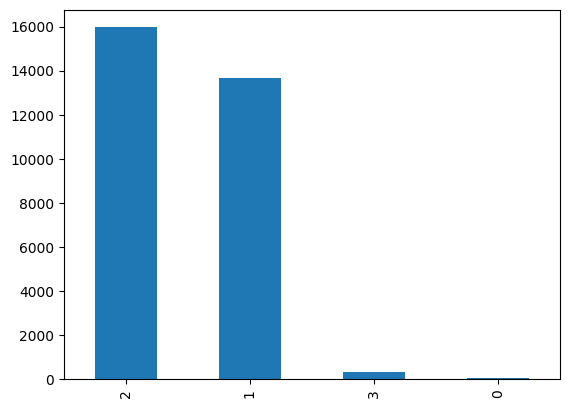

In [448]:
# Chart - 7 visualization code
df['MARRIAGE'].value_counts().plot(kind = 'bar')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

<Axes: xlabel='SEX'>

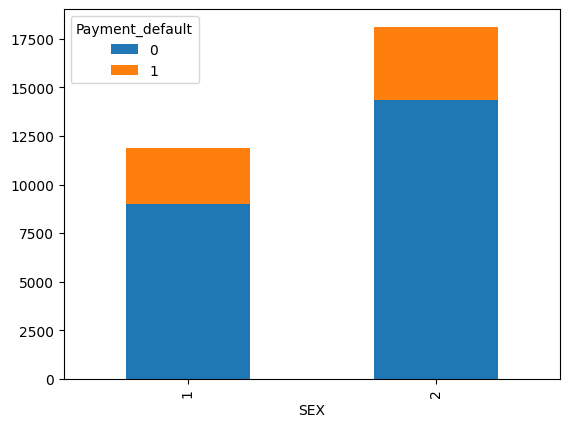

In [449]:
# Chart - 8 visualization code
df7 = df.groupby(['SEX','Payment_default']).size().unstack()
df7.plot(kind='bar',stacked= True)

In [450]:
df7["Percentage"] = df7[1]/(df7[0]+df7[1])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

<Axes: >

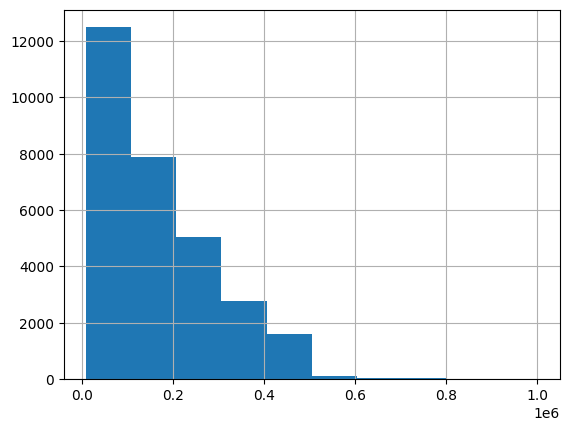

In [451]:
# Chart - 9 visualization code
df.LIMIT_BAL.hist()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

<Axes: >

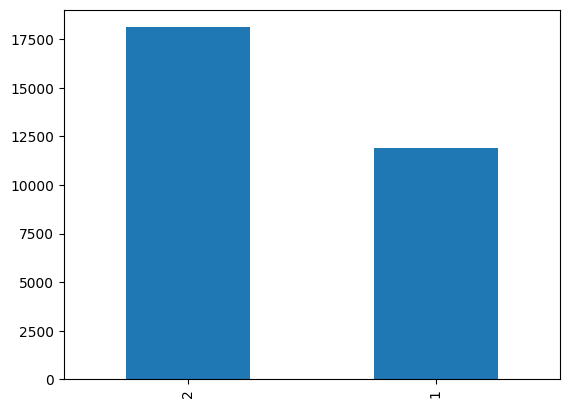

In [452]:
# Chart - 10 visualization code
df.SEX.value_counts().plot(kind='bar')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [453]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [454]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [455]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [456]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [457]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [458]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [459]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [460]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [461]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [462]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [463]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [464]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [465]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [466]:
# Transform Your data

### 6. Data Scaling

In [467]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [468]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [469]:
independent_variable = df.columns.to_list().remove('Payment_default')


In [470]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df.iloc[:,0:-1], df['Payment_default'])

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))
len(x_smote)

Original dataset shape 30000
Resampled dataset shape 46728


46728

In [471]:
# Split your data to train and test. Choose Splitting ratio wisely.
y = df['Payment_default'].copy()
X = df[[
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']].copy()

In [472]:
y.shape

(30000,)

In [478]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( x_smote,y_smote , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(37382, 25)
(9346, 25)


##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [479]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [480]:
# ML Model - 1 Implementation
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X_train, y_train)

# Fit the Algorithm

# Predict on the model

LogisticRegression(max_iter=10000)

In [481]:
clf.coef_

array([[-2.66994091e-06,  1.73015671e-04,  3.65857527e-04,
         1.37808717e-04,  1.48936250e-02,  1.18027534e-03,
         1.05504853e-03,  9.07114540e-04,  8.37481953e-04,
         7.57637763e-04,  6.99059172e-04, -8.88410238e-06,
         4.34417900e-06,  3.74684679e-06, -1.12649798e-06,
         4.72064877e-06,  2.52404863e-06, -2.85607202e-05,
        -2.31219885e-05, -7.05501115e-06, -1.03329737e-05,
        -9.42017324e-06, -2.18022689e-06,  2.29480550e-03,
         3.81310872e-04]])

In [482]:
clf.intercept_

array([0.00040986])

In [483]:
train_preds = clf.predict_proba(X_train)
test_preds = clf.predict_proba(X_test)

In [484]:
train_preds = clf.predict_proba(X_train)[:,1]
test_preds = clf.predict_proba(X_test)[:,1]

In [485]:
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [486]:
train_class_preds

array([0, 1, 1, ..., 1, 1, 1])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [487]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import accuracy_score, confusion_matrix
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.6262104756299823
The accuracy on test data is  0.6239032741279692


[[ 9706  9045]
 [ 4928 13703]]


[Text(0, 0.5, 'Not_Default'), Text(0, 1.5, 'Default')]

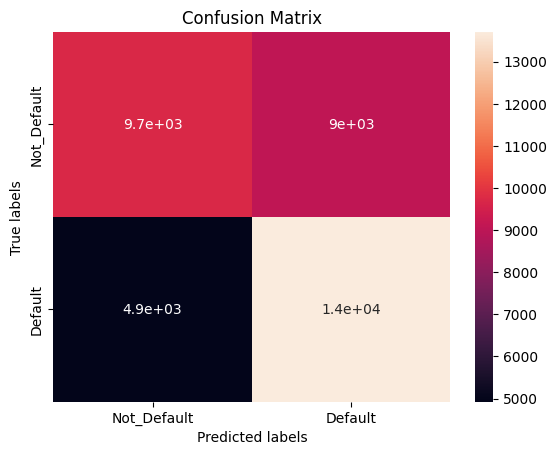

In [488]:
labels = ['Not_Default', 'Default']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [489]:
from sklearn.metrics import classification_report
print(classification_report(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.66      0.52      0.58     18751
           1       0.60      0.74      0.66     18631

    accuracy                           0.63     37382
   macro avg       0.63      0.63      0.62     37382
weighted avg       0.63      0.63      0.62     37382



#### 2. Cross- Validation & Hyperparameter Tuning

In [490]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate

In [491]:
logistic = LogisticRegression()

In [492]:
import sklearn

In [493]:
scoring = ['f1']

scores = cross_validate(logistic,X_train, y_train, scoring = scoring, cv = 8, return_train_score=True,return_estimator=True,verbose = 10)

[CV] START .....................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] END ...................... f1: (train=0.515, test=0.521) total time=   0.8s
[CV] START .....................................................................


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


[CV] END ...................... f1: (train=0.490, test=0.497) total time=   0.8s
[CV] START .....................................................................


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.6s remaining:    0.0s


[CV] END ...................... f1: (train=0.592, test=0.586) total time=   0.9s
[CV] START .....................................................................


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.6s remaining:    0.0s


[CV] END ...................... f1: (train=0.517, test=0.496) total time=   0.9s
[CV] START .....................................................................


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.6s remaining:    0.0s


[CV] END ...................... f1: (train=0.549, test=0.552) total time=   0.9s
[CV] START .....................................................................


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.4s remaining:    0.0s


[CV] END ...................... f1: (train=0.657, test=0.657) total time=   0.7s
[CV] START .....................................................................


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    5.9s remaining:    0.0s


[CV] END ...................... f1: (train=0.467, test=0.481) total time=   0.5s
[CV] START .....................................................................
[CV] END ...................... f1: (train=0.546, test=0.541) total time=   0.5s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    6.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    6.3s finished


In [494]:
scores['train_f1']

array([0.51451637, 0.4903629 , 0.59201155, 0.51653786, 0.54856862,
       0.65652014, 0.46715667, 0.54603445])

In [495]:
scores['test_f1']

array([0.52064632, 0.49682203, 0.58591941, 0.49620518, 0.5517583 ,
       0.65670468, 0.48092423, 0.54136074])

In [496]:
for model in scores['estimator']:
    print(model.coef_)

[[-7.80159114e-07  9.23796009e-06  2.04368021e-05  7.14723039e-06
   8.20666747e-04  6.53951059e-05  5.87424666e-05  5.00636224e-05
   4.65985598e-05  4.20840653e-05  3.88932363e-05 -4.47945828e-06
   1.41407851e-06  4.01784073e-06 -2.48384363e-06  1.14790640e-07
   6.50033858e-06 -2.25379384e-05 -1.64196162e-05 -3.11285621e-06
  -7.12048039e-06 -1.23936560e-05 -3.30762946e-06  1.26894472e-04
   2.05255715e-05]]
[[-8.01120120e-07  3.72032548e-06  7.73913365e-06  2.96994337e-06
   3.31992930e-04  2.62714897e-05  2.36008759e-05  2.02483593e-05
   1.87391333e-05  1.69682006e-05  1.56628170e-05 -7.46837512e-06
   5.01110458e-06  1.98287792e-06  2.03433975e-06 -8.15714424e-07
   5.01502564e-06 -2.64068763e-05 -1.71147812e-05 -6.24518246e-06
  -5.64797565e-06 -1.23172858e-05 -1.59785847e-06  5.11692223e-05
   8.09275815e-06]]
[[-1.48813770e-06  4.75060850e-05  9.81800080e-05  3.71363945e-05
   3.99613240e-03  3.11643577e-04  2.79548951e-04  2.42090470e-04
   2.22179777e-04  2.02590354e-04  1

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [525]:
# Visualizing evaluation Metric Score chart
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

In [527]:
import numpy as np

In [528]:
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20]}

# create the grid
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, scoring= 'accuracy')
# the cv option will be clear in a few cells

#training
grid_tree.fit(X_train, y_train)
#let's see the best estimator
print(grid_tree.best_estimator_)
#with its score
print(np.abs(grid_tree.best_score_))

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=5)
1.0


In [520]:
classifier = RandomForestClassifier() # For GBM, use GradientBoostingClassifier()
grid_values = {'n_estimators':[20, 30, 40], 'max_depth':[2,3]}
classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=2)

# Fit the object to train dataset
classifier.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3], 'n_estimators': [20, 30, 40]},
             scoring='roc_auc')

In [521]:
train_preds =  classifier.predict(X_train)
test_preds  = classifier.predict(X_test)

In [522]:
accuracy_score(y_train,train_preds)

0.9998394949440907

In [523]:
roc_auc_score(y_train,train_preds)

0.9998400085328782

In [524]:
confusion_matrix(y_train,train_preds)

array([[18745,     6],
       [    0, 18631]])

#### 2. Cross- Validation & Hyperparameter Tuning

In [503]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [504]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [505]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [506]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [507]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [508]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***